In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import geo_tools

%matplotlib inline

In [2]:
meshfile = '/home/sallen/MEOPAR/grid/mesh_mask201702.nc'
mesh = nc.Dataset(meshfile)
model_lats = mesh.variables['nav_lat'][:]
model_lons = mesh.variables['nav_lon'][:]
t_mask = mesh.variables['tmask'][0, 0]

In [8]:
def get_tidal_stations(lon, lat, model_lons, model_lats, t_mask, size=20):
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats, grid='NEMO', land_mask=1-t_mask)

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    imin, imax = y - size, y + size
    jmin, jmax = x - size, x + size
    ax.pcolormesh(t_mask[imin:imax, jmin:jmax], cmap='Greys_r')
    ax.plot(size+0.5, size+0.5, 'ro')
    return y, x

### Patricia Bay

7277	Patricia Bay	48.6536 	123.4515 

(351, 214)

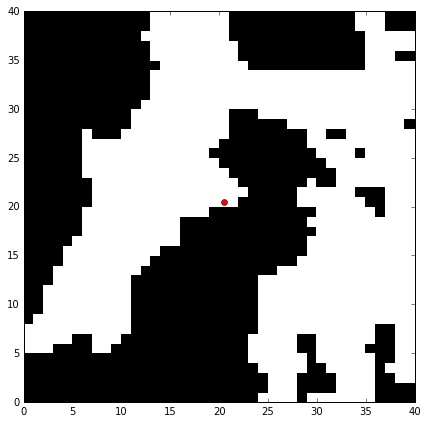

In [9]:
get_tidal_stations(-123.4515, 48.6536, model_lons, model_lats, t_mask)

### Woodwards
7610	Woodwards's Landing	49.1251 	123.0754 

(414, 329)

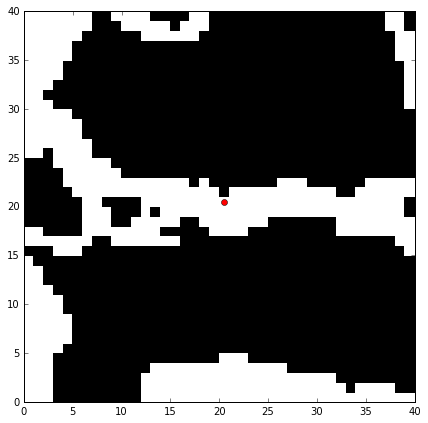

In [13]:
get_tidal_stations(-123.0754, 49.1251, model_lons, model_lats, t_mask, size=20)

### New Westminster
7654	New Westminster	49.203683 	122.90535 

(423, 363)

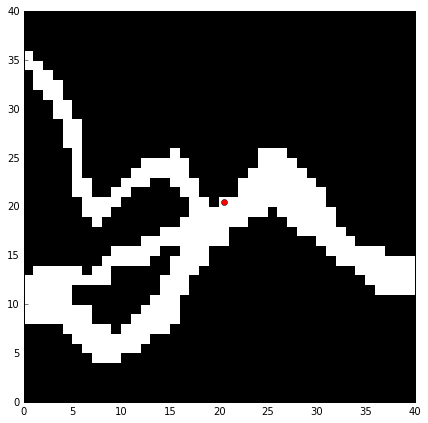

In [14]:
get_tidal_stations(-122.90535, 49.203683, model_lons, model_lats, t_mask, size=20)

### Sandy Cove
7786	Sandy Cove	49.34 	123.23 

(468, 333)

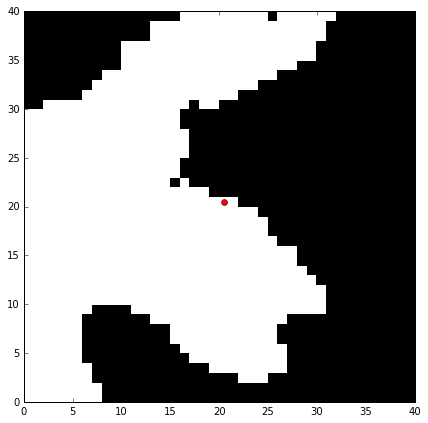

In [15]:
get_tidal_stations(-123.23, 49.34, model_lons, model_lats, t_mask, size=20)

### Port Renfrew 
check
8525	Port Renfrew	48.555	124.421

(401, 61)

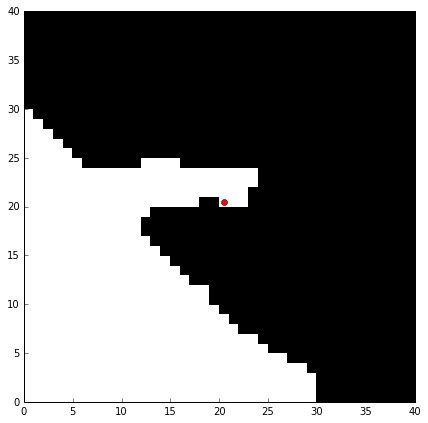

In [16]:
get_tidal_stations(-124.421, 48.555, model_lons, model_lats, t_mask, size=20)

### Victoria
7120	Victoria	48.424666 	123.3707 

(302, 196)

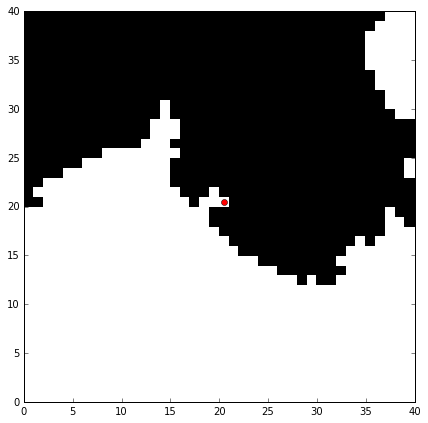

In [17]:
get_tidal_stations(-123.3707, 48.424666, model_lons, model_lats, t_mask, size=20)

### Sand Heads
7594	Sand Heads	49.125	123.195 

(424, 311)

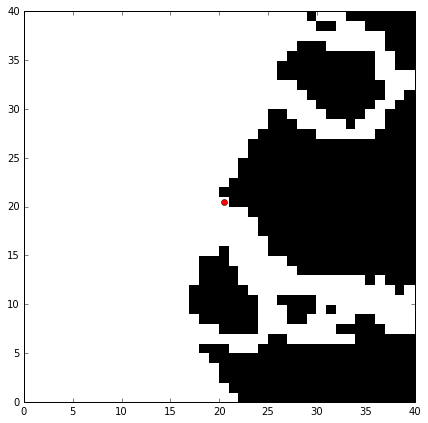

In [18]:
get_tidal_stations(-123.195, 49.125, model_lons, model_lats, t_mask, size=20)

### Nanaimo
7917	Nanaimo	49.17 	123.93 

(485, 209)

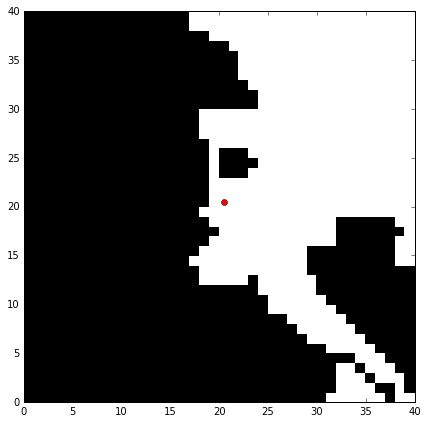

In [19]:
get_tidal_stations(-123.93, 49.17, model_lons, model_lats, t_mask, size=20)

In our code its at 484, 208 with lon,lat at -123.93 and 49.16: leave as is for now

In [21]:
from salishsea_tools import places

In [22]:
places.PLACES['Sand Heads']

{'GEM2.5 grid ji': (135, 151),
 'NEMO grid ji': (426, 292),
 'lon lat': (-123.3, 49.1),
 'stn number': 7594}